In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence).

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/ml/heart.csv'


df = pd.read_csv(file_path)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target', ylabel='count'>

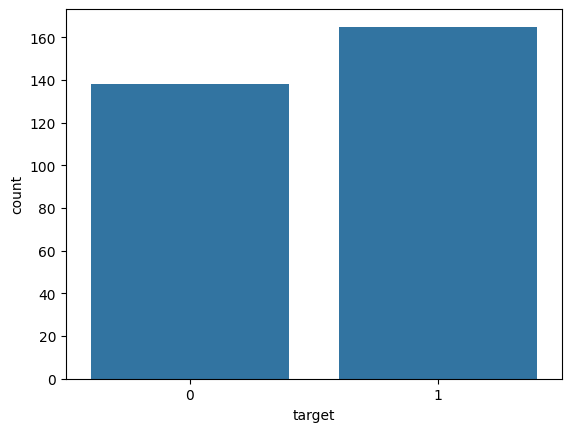

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

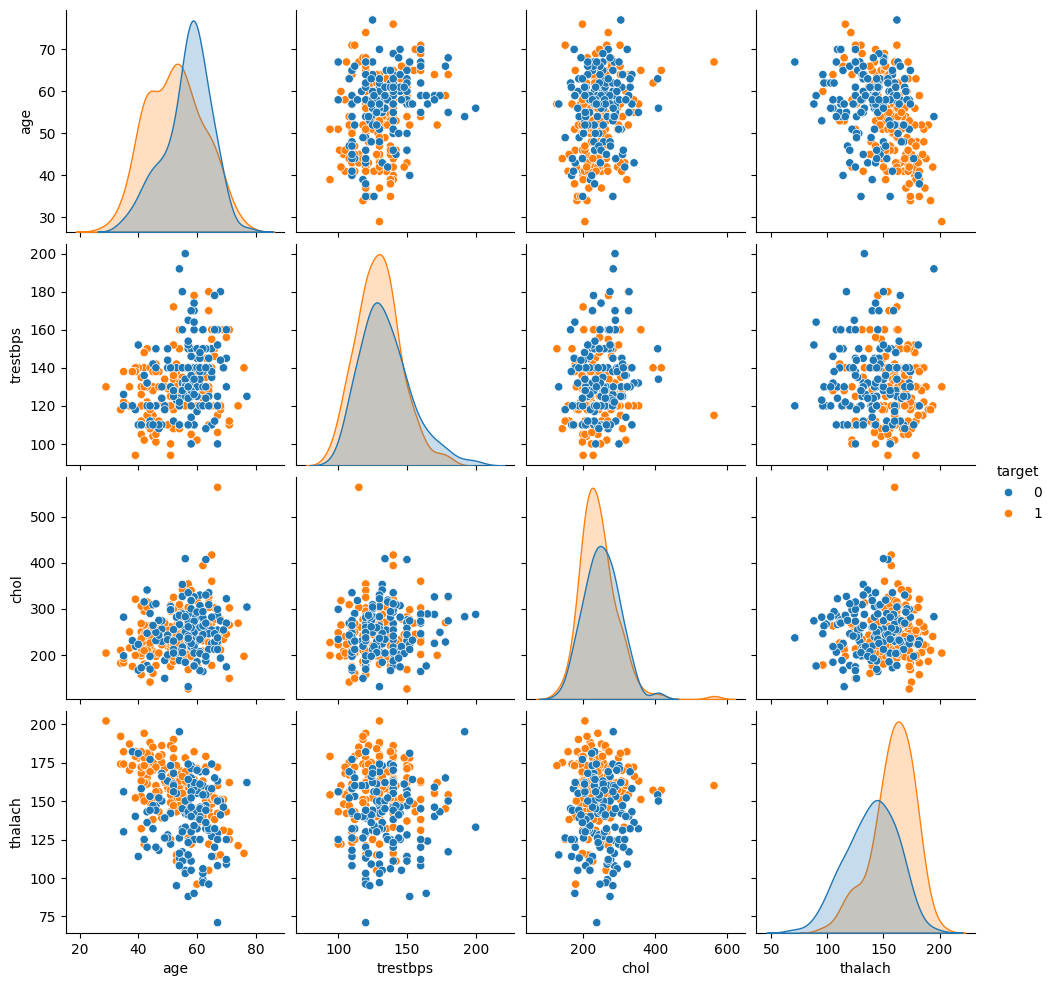

In [ ]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<Axes: >

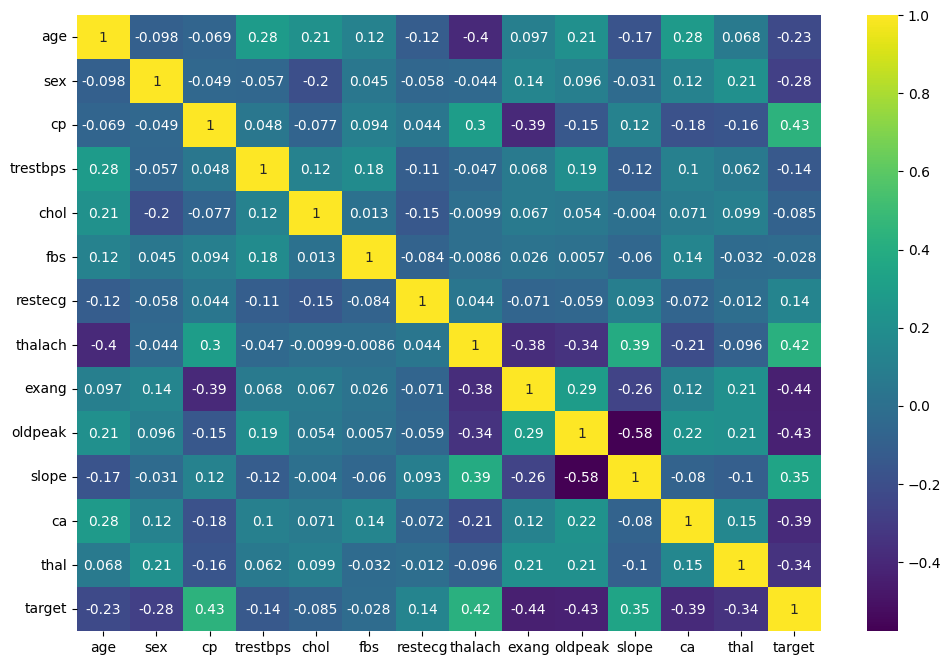

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [ ]:
X = df.drop('target',axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

[[12  3]
 [ 2 14]]


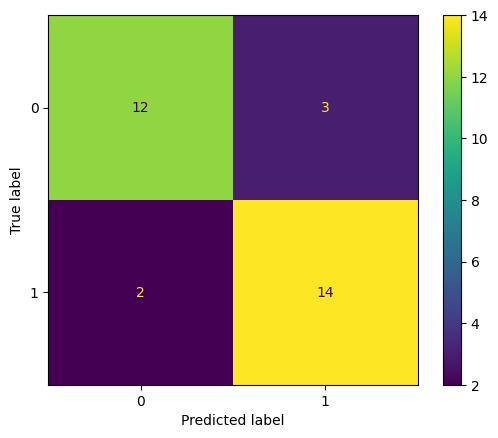

In [ ]:
# prompt: logistic regression model and all evaluation classification report, confusion matrix, plot_precision_recall_curve and plot_roc_curve

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the model
log_model = LogisticRegression() # Increased max_iter for convergence
log_model.fit(scaled_X_train,y_train)

# Make predictions
y_pred = log_model.predict(scaled_X_test)

# Evaluate the model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=log_model.classes_)
disp.plot()


# from sklearn.metrics import  plot_precision_recall_curve
# # # Plot Precision-Recall curve
# plot_precision_recall_curve(log_model,scaled_X_test,y_test)
# plt.show()

# from sklearn.metrics import plot_roc_curve
# # # Plot ROC curve
# plot_roc_curve(log_model,scaled_X_test,y_test)
# plt.show()


# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
# display.plot()

In [ ]:
patient = [[ 52. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. , 3.2,   1. ,   2. ,   2. ]]
patient

[[52.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]

In [ ]:

# Assuming 'patient' is a list representing a new patient's data
# and it has the same features as the training data (same order and scaling)

# Scale the new patient's data
scaled_patient = scaler.transform(patient)

# Predict the probability of heart disease for the new patient
probabilities = log_model.predict_proba(scaled_patient)
print("Predicted probabilities:", probabilities)

# Predict the class (0 or 1) for the new patient
prediction = log_model.predict(scaled_patient)
print("Prediction:", prediction)

# Interpret the prediction (0: No heart disease, 1: Heart disease)
if prediction[0] == 0:
  print("The model predicts no presence of heart disease for the new patient.")
else:
  print("The model predicts presence of heart disease for the new patient.")


Predicted probabilities: [[0.99068645 0.00931355]]
Prediction: [0]
The model predicts no presence of heart disease for the new patient.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_patients_df = [
    [52.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0],
    [60.0, 1.0, 1.0, 140.0, 268.0, 0.0, 0.0, 160.0, 0.0, 3.6, 0.0, 2.0, 2.0]
]

In [ ]:
# import pandas as pd
# new_patients_df = pd.read_csv('new_patients_file.csv')


# Scale the new patient's data using the same scaler fitted on training data
scaled_new_patients = scaler.transform(new_patients_df)

# Predict the probabilities for each new patient
new_patient_probabilities = log_model.predict_proba(scaled_new_patients)

# Predict classes for each new patient
new_patient_predictions = log_model.predict(scaled_new_patients)
new_patient_predictions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 0])